In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
new_cols = {
    'expected_hours': 'horas_esperadas',
    'price': 'preco',
    'unfinished': 'nao_finalizado'
}
dados = dados.rename(columns= new_cols)
troca = {
    0: 1,
    1: 0
}
dados.head()

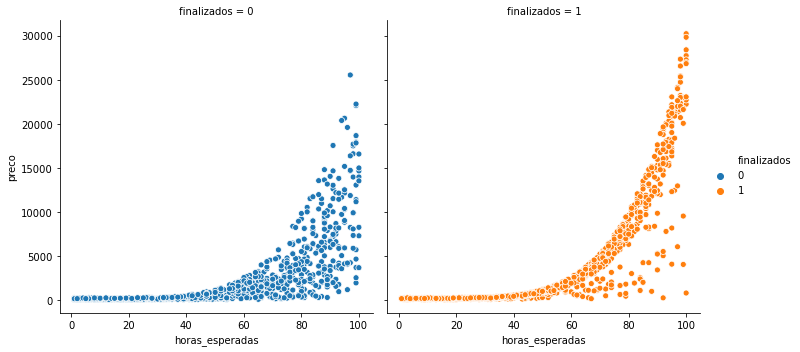

In [12]:
dados['finalizados'] = dados.nao_finalizado.map(troca)
import seaborn as sns
sns.relplot(x="horas_esperadas", y="preco", data = dados, col="finalizados",hue="finalizados")

In [13]:
x = dados[['horas_esperadas','preco']]
y = dados[['finalizados']]

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 57.04%


In [15]:
import numpy as np
         
prev = np.ones(540)
acc = accuracy_score(teste_y, prev) * 100
print("Accuaramcy foi de %.2f%%" % acc)

Accuaramcy foi de 52.59%
